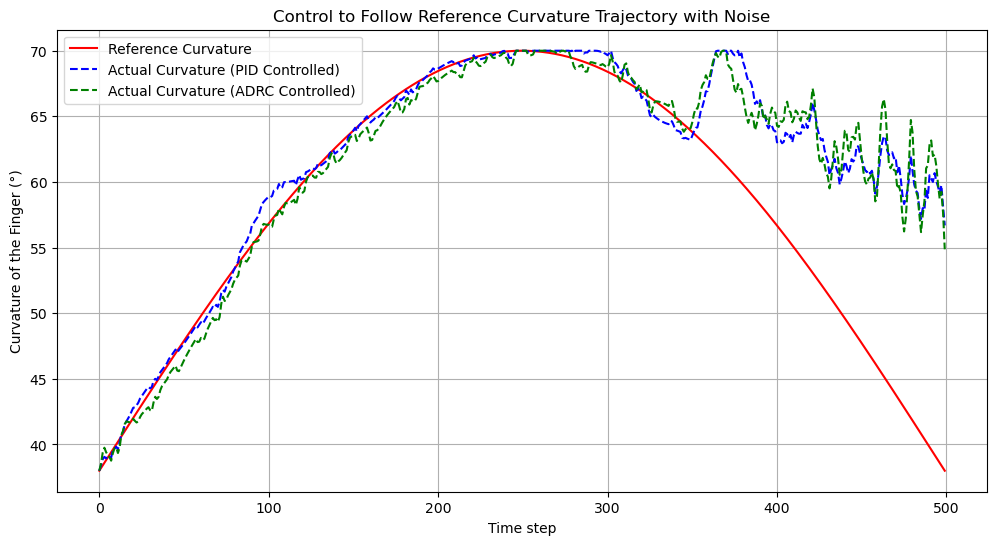

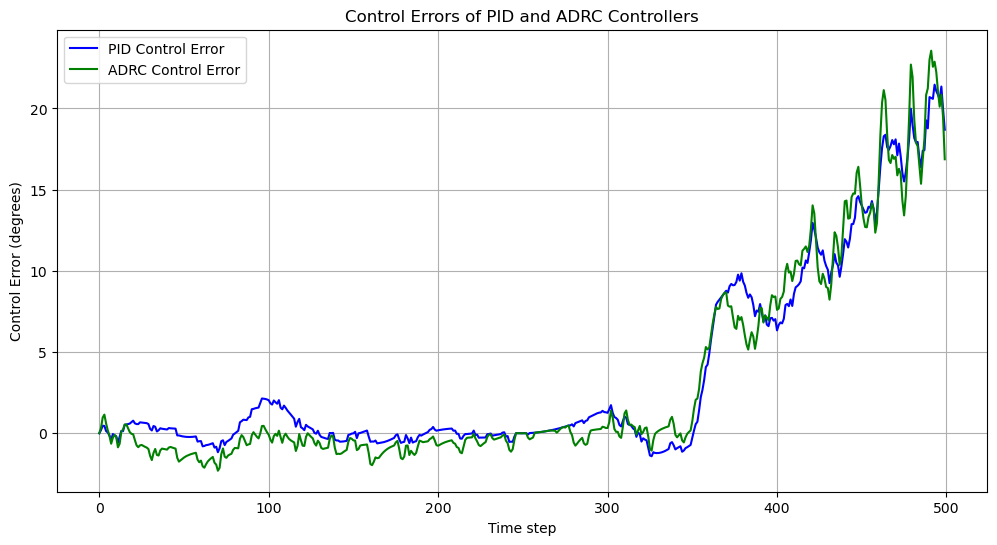

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PID controller function
def pid_controller(setpoint, measured_value, Kp, Ki, Kd, dt, integral_prev, error_prev):
    error = setpoint - measured_value
    integral = integral_prev + error * dt
    derivative = (error - error_prev) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return output, integral, error

# Define the ADRC controller function
def adrc_controller(setpoint, measured_value, kp, b, w, dt, tracking_error_prev):
    tracking_error = setpoint - measured_value
    control_signal = kp * tracking_error + b * tracking_error_prev
    tracking_error_prev = (1 - w * dt) * tracking_error
    return control_signal, tracking_error_prev

# Define time steps
time_steps = np.linspace(0, 499, 500)  # 500 time steps

# Generate the reference curvature trajectory
amplitude = (70 - 38)  # Amplitude of the sinusoidal part
midpoint = 38  # Starting point
curvature = amplitude * np.sin(np.pi * time_steps / 499) + midpoint

# Define PID gains
Kp = 0.6  # Proportional gain
Ki = 0.1  # Integral gain
Kd = 0.05  # Derivative gain

# Initialize storage for the PID output and the actual curvature
pid_output = np.zeros_like(time_steps)
theta_actual = np.full_like(time_steps, 38)  # Initialize the actual curvature to 38 degrees

# Define noise parameters
noise_amplitude = 6  # Noise will vary within +/- this amplitude
noise_frequency = 0.4  # The frequency of noise introduction

# Initial previous values for integral and error for the PID
integral_prev = 0
error_prev = 0

# Randomize the noise introduction frequency
random_intervals = np.random.choice([True, False], size=time_steps.shape, p=[noise_frequency, 1 - noise_frequency])

# Define a scaling factor for the PID output to system state update
control_scale_factor = 0.1
max_output = 70  # Maximum output limit

# Define ADRC gains
kp_adrc = 1  # Proportional gain for ADRC
b_adrc = 0.5  # Gain b in the ADRC algorithm
w_adrc = 0.005  # Gain w in the ADRC algorithm

# Initialize storage for the ADRC output and the actual curvature
adrc_output = np.zeros_like(time_steps)
theta_actual_adrc = np.full_like(time_steps, 38)  # Initialize the actual curvature to 38 degrees

# Initial previous value for tracking error for the ADRC
tracking_error_prev_adrc = 0

# Initialize arrays to store control errors
pid_error = np.zeros_like(time_steps)
adrc_error = np.zeros_like(time_steps)

# Modified PID and ADRC control loop with exponentially increasing negative noise after 350 time steps
for i in range(1, len(time_steps)):
    # Generate random noise at reduced frequency
    noise = noise_amplitude * np.random.uniform(-1, 1) if random_intervals[i] else 0.0

    # Introduce random negative noise that increases exponentially after 350 time steps
    if i >= 350:
        exponential_factor = 1.011  # Exponential growth factor for the noise
        max_negative_noise = -10 * (exponential_factor ** (i - 350))  # Exponentially increasing negative noise
        noise += np.random.uniform(max_negative_noise, 0)  # Add random negative noise within the exponential range

    # Apply noise to the reference signal to simulate measurement noise
    noisy_measurement = theta_actual[i-1] + noise

    # PID Controller
    pid_output[i], integral_prev, error_prev = pid_controller(
        curvature[i], noisy_measurement, Kp, Ki, Kd,
        time_steps[i] - time_steps[i-1], integral_prev, error_prev
    )
    theta_actual[i] = min(theta_actual[i-1] + pid_output[i] * control_scale_factor, max_output)

    # Apply noise to the reference signal for ADRC
    noisy_measurement_adrc = theta_actual_adrc[i-1] + noise

    # ADRC Controller
    adrc_output[i], tracking_error_prev_adrc = adrc_controller(
        curvature[i], noisy_measurement_adrc, kp_adrc, b_adrc, w_adrc,
        time_steps[i] - time_steps[i-1], tracking_error_prev_adrc
    )
    theta_actual_adrc[i] = min(theta_actual_adrc[i-1] + adrc_output[i] * control_scale_factor, max_output)

    # Calculate control errors
    pid_error[i] = theta_actual[i] - curvature[i]
    adrc_error[i] = theta_actual_adrc[i] - curvature[i]

# Plot the reference trajectory and the actual trajectory controlled by ADRC
plt.figure(figsize=(12, 6))
plt.plot(time_steps, curvature, 'r-', label='Reference Curvature')
plt.plot(time_steps, theta_actual, 'b--', label='Actual Curvature (PID Controlled)')
plt.plot(time_steps, theta_actual_adrc, 'g--', label='Actual Curvature (ADRC Controlled)')
plt.xlabel('Time step')
plt.ylabel('Curvature of the Finger (°)')
plt.title('Control to Follow Reference Curvature Trajectory with Noise')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Control Errors
plt.figure(figsize=(12, 6))
plt.plot(time_steps, pid_error, 'b-', label='PID Control Error')
plt.plot(time_steps, adrc_error, 'g-', label='ADRC Control Error')
plt.xlabel('Time step')
plt.ylabel('Control Error (degrees)')
plt.title('Control Errors of PID and ADRC Controllers')
plt.legend()
plt.grid(True)
plt.show()

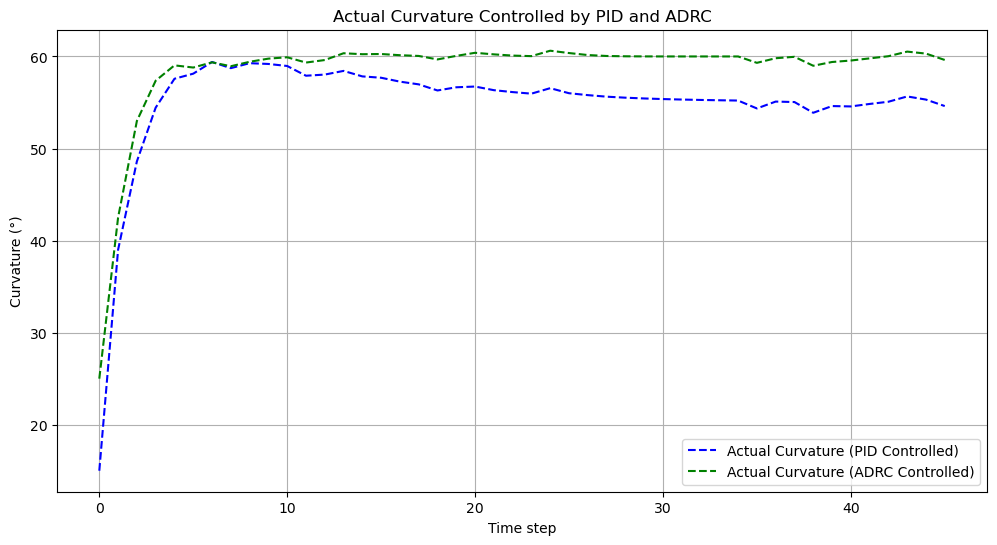

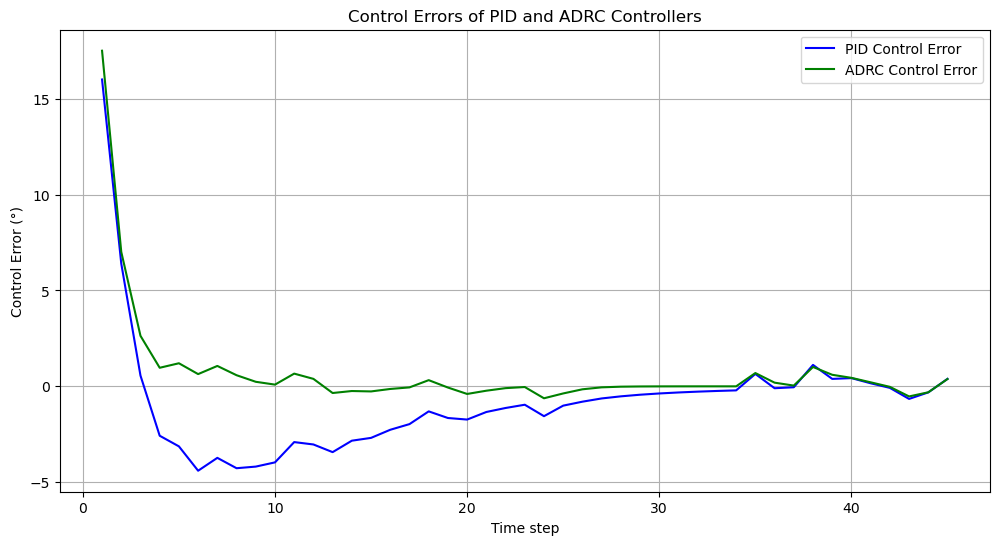

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PID controller function
def pid_controller(setpoint, measured_value, Kp, Ki, Kd, dt, integral_prev, error_prev):
    error = setpoint - measured_value
    integral = integral_prev + error * dt
    derivative = (error - error_prev) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    return output, integral, error

# Define the ADRC controller function
def adrc_controller(setpoint, measured_value, kp, b, w, dt, tracking_error_prev):
    tracking_error = setpoint - measured_value
    control_signal = kp * tracking_error + b * tracking_error_prev
    tracking_error_prev = (1 - w * dt) * tracking_error
    return control_signal, tracking_error_prev

# Define time steps
time_steps = np.linspace(0, 45, 46)  # 46 time steps from 0 to 45

# Set new setpoints and start points for PID and ADRC
pid_setpoint = 55
pid_start_point = 15
adrc_setpoint = 60
adrc_start_point = 25

# Generate reference trajectories for PID and ADRC
pid_curvature = np.full_like(time_steps, pid_setpoint)
adrc_curvature = np.full_like(time_steps, adrc_setpoint)

# Define PID gains
Kp = 5.0  # Proportional gain
Ki = 0.5  # Integral gain
Kd = 0.5  # Derivative gain

# Initialize storage for the PID output and the actual curvature
pid_output = np.zeros_like(time_steps)
theta_actual_pid = np.full_like(time_steps, pid_start_point)  # Initialize the actual curvature to 15 degrees

# Define noise parameters
noise_amplitude = 2  # Noise will vary within +/- this amplitude
noise_frequency = 0.4  # The frequency of noise introduction

# Initial previous values for integral and error for the PID
integral_prev = 0
error_prev = 0

# Randomize the noise introduction frequency
random_intervals = np.random.choice([True, False], size=time_steps.shape, p=[noise_frequency, 1 - noise_frequency])

# Define a scaling factor for the PID output to system state update
control_scale_factor = 0.1
max_output = 70  # Maximum output limit

# Define ADRC gains
kp_adrc = 5  # Proportional gain for ADRC
b_adrc = 0.5  # Gain b in the ADRC algorithm
w_adrc = 0.005  # Gain w in the ADRC algorithm

# Initialize storage for the ADRC output and the actual curvature
adrc_output = np.zeros_like(time_steps)
theta_actual_adrc = np.full_like(time_steps, adrc_start_point)  # Initialize the actual curvature to 25 degrees

# Initial previous value for tracking error for the ADRC
tracking_error_prev_adrc = 0

# Initialize arrays to store control errors
pid_error = np.zeros_like(time_steps)
adrc_error = np.zeros_like(time_steps)

# Modified PID and ADRC control loop
for i in range(1, len(time_steps)):
    # Generate random noise at reduced frequency
    noise = noise_amplitude * np.random.uniform(-1, 1) if random_intervals[i] else 0.0

    # # Introduce random negative noise that increases exponentially after 350 time steps
    # if i >= 350:
    #     exponential_factor = 1.011  # Exponential growth factor for the noise
    #     max_negative_noise = -10 * (exponential_factor ** (i - 350))  # Exponentially increasing negative noise
    #     noise += np.random.uniform(max_negative_noise, 0)  # Add random negative noise within the exponential range
        
    # Apply noise to the reference signal to simulate measurement noise
    noisy_measurement = theta_actual_pid[i-1] + noise

    # PID Controller
    pid_output[i], integral_prev, error_prev = pid_controller(
        pid_setpoint, noisy_measurement, Kp, Ki, Kd,
        time_steps[i] - time_steps[i-1], integral_prev, error_prev
    )
    theta_actual_pid[i] = min(theta_actual_pid[i-1] + pid_output[i] * control_scale_factor, max_output)

    # Calculate PID control error (difference between setpoint and actual output)
    pid_error[i] = pid_setpoint - theta_actual_pid[i]

    # Apply noise to the reference signal for ADRC
    noisy_measurement_adrc = theta_actual_adrc[i-1] + noise

    # ADRC Controller
    adrc_output[i], tracking_error_prev_adrc = adrc_controller(
        adrc_setpoint, noisy_measurement_adrc, kp_adrc, b_adrc, w_adrc,
        time_steps[i] - time_steps[i-1], tracking_error_prev_adrc
    )
    theta_actual_adrc[i] = min(theta_actual_adrc[i-1] + adrc_output[i] * control_scale_factor, max_output)

    # Calculate ADRC control error (difference between setpoint and actual output)
    adrc_error[i] = adrc_setpoint - theta_actual_adrc[i]

# Continue execution to generate and display plots
# Plot the actual trajectory controlled by PID and ADRC
plt.figure(figsize=(12, 6))
plt.plot(time_steps, theta_actual_pid, 'b--', label='Actual Curvature (PID Controlled)')
plt.plot(time_steps, theta_actual_adrc, 'g--', label='Actual Curvature (ADRC Controlled)')
# plt.axhline(y=pid_setpoint, color='b', linestyle='-', label='PID Setpoint')
# plt.axhline(y=adrc_setpoint, color='g', linestyle='-', label='ADRC Setpoint')
plt.xlabel('Time step')
plt.ylabel('Curvature (°)')
plt.title('Actual Curvature Controlled by PID and ADRC')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Control Errors
plt.figure(figsize=(12, 6))
plt.plot(time_steps[1:], pid_error[1:], 'b-', label='PID Control Error')
plt.plot(time_steps[1:], adrc_error[1:], 'g-', label='ADRC Control Error')
plt.xlabel('Time step')
plt.ylabel('Control Error (°)')
plt.title('Control Errors of PID and ADRC Controllers')
plt.legend()
plt.grid(True)
plt.show()


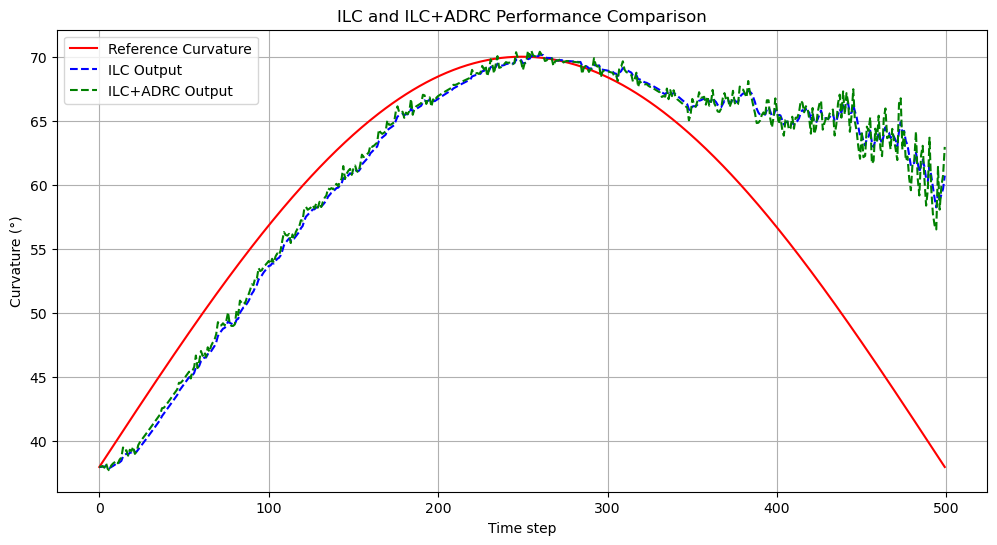

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ADRC controller function
def adrc_controller(setpoint, measured_value, kp, b, w, dt, tracking_error_prev):
    tracking_error = setpoint - measured_value
    control_signal = kp * tracking_error + b * tracking_error_prev
    tracking_error_prev = (1 - w * dt) * tracking_error
    return control_signal, tracking_error_prev

# Define time steps
time_steps = np.linspace(0, 499, 500)  # 500 time steps

# Generate the reference curvature trajectory
amplitude = (70 - 38)  # Amplitude of the sinusoidal part
midpoint = 38  # Starting point
curvature = amplitude * np.sin(np.pi * time_steps / 499) + midpoint

# Define noise parameters
noise_amplitude = 6  # Noise will vary within +/- this amplitude
noise_frequency = 0.4  # The frequency of noise introduction

# Randomize the noise introduction frequency
random_intervals = np.random.choice([True, False], size=time_steps.shape, p=[noise_frequency, 1 - noise_frequency])

# Define a scaling factor for the ILC and ADRC output to system state update
control_scale_factor = 0.2

# Define ADRC gains
kp_adrc = 0.5  # Proportional gain for ADRC
b_adrc = 0.1  # Gain b in the ADRC algorithm
w_adrc = 0.1  # Gain w in the ADRC algorithm

# Define ILC parameters
N_J = 1  # Number of ILC iterations
k1 = 0.05  # ILC gain 1
k2 = 0.001  # ILC gain 2

# Initialize storage for ILC outputs and errors
ilc_output = np.full_like(time_steps, 38)  # Start at 38 degrees
ilc_error = np.zeros_like(time_steps)

# Initialize storage for ILC+ADRC outputs and errors
ilc_adrc_output = np.full_like(time_steps, 38)  # Start at 38 degrees
ilc_adrc_error = np.zeros_like(time_steps)

# Start ILC and ILC+ADRC control loop
for j in range(N_J):
    tracking_error_prev_adrc = 0  # Reset tracking error for ADRC at each ILC iteration
    for i in range(1, len(time_steps)):
        # Generate random noise at reduced frequency
        noise = noise_amplitude * np.random.uniform(-1, 1) if random_intervals[i] else 0.0

        # # Introduce random negative noise that increases exponentially after 350 time steps
        if i >= 350:
            exponential_factor = 1.011  # Exponential growth factor for the noise
            max_negative_noise = -10 * (exponential_factor ** (i - 350))  # Exponentially increasing negative noise
            noise += np.random.uniform(max_negative_noise, 0)  # Add random negative noise within the exponential range

        # Apply noise to simulate measurement noise
        noisy_measurement = ilc_output[i-1] + noise

        # Calculate current error for ILC
        e_curr = curvature[i] - noisy_measurement

        # ILC Controller Update
        if j > 0:
            e_prev = ilc_error[i-1]
            ilc_output[i] = ilc_output[i-1] + k1 * e_curr + k2 * e_prev
        else:
            ilc_output[i] = ilc_output[i-1] + k1 * e_curr  # No previous error on first iteration

        # ADRC Controller for current error
        adrc_signal, tracking_error_prev_adrc = adrc_controller(
            curvature[i], noisy_measurement, kp_adrc, b_adrc, w_adrc,
            time_steps[i] - time_steps[i-1], tracking_error_prev_adrc
        )

        # ILC+ADRC Controller Update
        ilc_adrc_output[i] = ilc_output[i] + adrc_signal * control_scale_factor

        # Update errors
        ilc_error[i] = curvature[i] - ilc_output[i]
        ilc_adrc_error[i] = curvature[i] - ilc_adrc_output[i]

    # Prepare for next iteration, if required
    if N_J > 1:
        ilc_output[0] = ilc_output[-1]  # Carry last output to next iteration's start for ILC
        ilc_adrc_output[0] = ilc_adrc_output[-1]  # Carry last output to next iteration's start for ILC+ADRC

# print(ilc_output)
# print(ilc_adrc_output)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_steps, curvature, 'r-', label='Reference Curvature')
plt.plot(time_steps, ilc_output, 'b--', label='ILC Output')
plt.plot(time_steps, ilc_adrc_output, 'g--', label='ILC+ADRC Output')
plt.xlabel('Time step')
plt.ylabel('Curvature (°)')
plt.title('ILC and ILC+ADRC Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

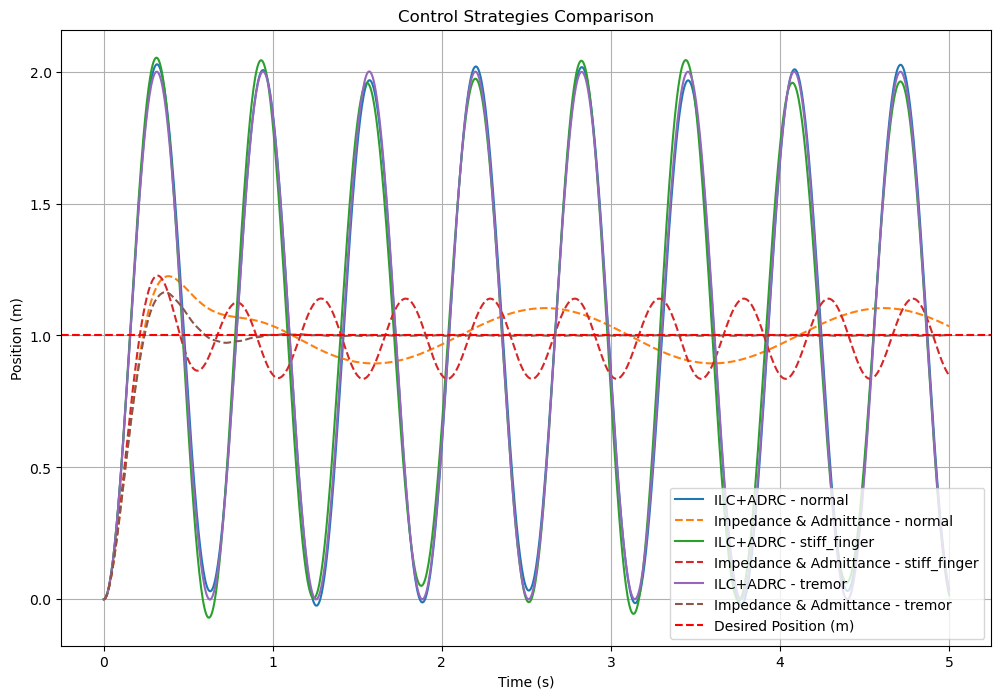

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters for the mass-damper-spring system
mass = 1.0  # mass (kg)
damping = 10.0  # damping coefficient (Ns/m)
stiffness = 100.0  # spring stiffness (N/m)
desired_position = 1.0  # desired position (m)

# Time vector
time = np.linspace(0, 5, 1000)  # 5 seconds, 1000 points

# Initial conditions: position and velocity
initial_conditions = [0.0, 0.0]

def nonlinear_external_force(t, user_type):
    """
    Simulate a nonlinear external force to represent complex interaction dynamics.
    `user_type` can vary the pattern to simulate different user profiles.
    """
    if user_type == 'stiff_finger':
        # Higher frequency and amplitude to represent stiff finger movements
        return 7.0 * np.sin(4 * np.pi * t)
    elif user_type == 'tremor':
        # Rapid, small amplitude fluctuations to simulate tremors
        return 3.0 * np.sin(20 * np.pi * t)
    else:
        # Default pattern for general interaction
        return 5.0 * np.sin(2 * np.pi * 0.5 * t)

# Including a factor to represent interaction dynamics between the finger and the robot
def interaction_dynamics(t, user_type):
    """
    Represents the interaction dynamics between the finger and the robot.
    This function introduces an interaction factor that varies over time and by user type.
    """
    if user_type == 'stiff_finger':
        return 1.2 * np.sin(2 * np.pi * t)  # Higher interaction for stiff fingers
    elif user_type == 'tremor':
        return 0.8 * np.sin(10 * np.pi * t)  # Frequent interaction for tremors
    else:
        return np.sin(2 * np.pi * 0.5 * t)  # Normal interaction

# Updating the ILC + ADRC dynamics to include interaction dynamics
def updated_ILC_ADRC_dynamics(y, t, mass, stiffness, desired_position, user_type, previous_errors, learning_rate=0.1):
    position, velocity = y
    interaction_force = nonlinear_external_force(t, user_type) + interaction_dynamics(t, user_type)

    # ILC Part: Adjusting control based on previous errors
    if t > 0 and int(t) < len(previous_errors):
        ilc_adjustment = learning_rate * previous_errors[int(t)-1]
    else:
        ilc_adjustment = 0

    # ADRC Part: Estimating and compensating external disturbances
    estimated_disturbance = interaction_force * 0.5  # Simplified estimation
    adrc_adjustment = estimated_disturbance

    # Combining ILC and ADRC with interaction dynamics
    acc = ((interaction_force - adrc_adjustment) - stiffness * (position - desired_position) - ilc_adjustment) / mass
    return [velocity, acc]

# Implementing Impedance and Admittance Control in the Simulation
def impedance_admittance_dynamics(y, t, mass, user_type, patient_feedback):
    position, velocity = y
    interaction_force = nonlinear_external_force(t, user_type)

    # Impedance Control: Adjust stiffness and damping based on interaction force
    desired_stiffness = 100.0 + patient_feedback['stiffness_adjustment'] * interaction_force
    desired_damping = 10.0 + patient_feedback['damping_adjustment'] * interaction_force

    # Admittance Control: Allowing system to adjust position in response to force
    desired_position_adjustment = patient_feedback['position_adjustment'] * interaction_force
    desired_position = 1.0 + desired_position_adjustment

    # System Dynamics with Impedance and Admittance Control
    acc = (interaction_force - desired_damping * velocity - desired_stiffness * (position - desired_position)) / mass
    return [velocity, acc]

# Re-running the simulation with the updated ILC + ADRC control system
updated_ilc_adrc_results = {}
previous_errors = np.zeros(len(time))  # Re-initializing previous errors

# Run simulations for different user profiles and control strategies
user_profiles = ['normal', 'stiff_finger', 'tremor']
updated_ilc_adrc_results = {}  # Results for updated ILC + ADRC control
imp_adm_results = {} 

def calculate_acceleration(velocity, time):
    # Calculate acceleration from velocity and time
    acceleration = np.diff(velocity) / np.diff(time)
    return np.concatenate(([0], acceleration))  # Append 0 to match the length of time array

def calculate_smoothness_metric(acceleration):
    # Calculate smoothness metric from acceleration
    return np.sum(np.abs(np.diff(acceleration)))

# Patient feedback patterns
patient_feedback_patterns = {
    'normal': {'stiffness_adjustment': 0.1, 'damping_adjustment': 0.1, 'position_adjustment': 0.01},
    'stiff_finger': {'stiffness_adjustment': 0.2, 'damping_adjustment': 0.2, 'position_adjustment': 0.02},
    'tremor': {'stiffness_adjustment': 0.05, 'damping_adjustment': 0.05, 'position_adjustment': 0.005}
}

# Running simulations
user_profiles = ['normal', 'stiff_finger', 'tremor']
updated_ilc_adrc_results = {}
imp_adm_results = {}

for user_type in user_profiles:
    # Run simulation for updated ILC + ADRC control
    solution = odeint(updated_ILC_ADRC_dynamics, initial_conditions, time, 
                      args=(mass, stiffness, desired_position, user_type, previous_errors, 0.1))
    position_ilc_adrc = solution[:, 0]
    updated_ilc_adrc_results[user_type] = position_ilc_adrc

    # Run simulation for Impedance and Admittance Control
    patient_feedback = patient_feedback_patterns[user_type]
    solution = odeint(impedance_admittance_dynamics, initial_conditions, time, 
                      args=(mass, user_type, patient_feedback))
    position_imp_adm = solution[:, 0]
    imp_adm_results[user_type] = position_imp_adm

# Plotting results for comparison
plt.figure(figsize=(12, 8))
for user_type in user_profiles:
    plt.plot(time, updated_ilc_adrc_results[user_type], label=f'ILC+ADRC - {user_type}')
    plt.plot(time, imp_adm_results[user_type], label=f'Impedance & Admittance - {user_type}', linestyle='--')

plt.axhline(y=desired_position, color='r', linestyle='--', label='Desired Position (m)')
plt.title('Control Strategies Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid(True)
plt.show()


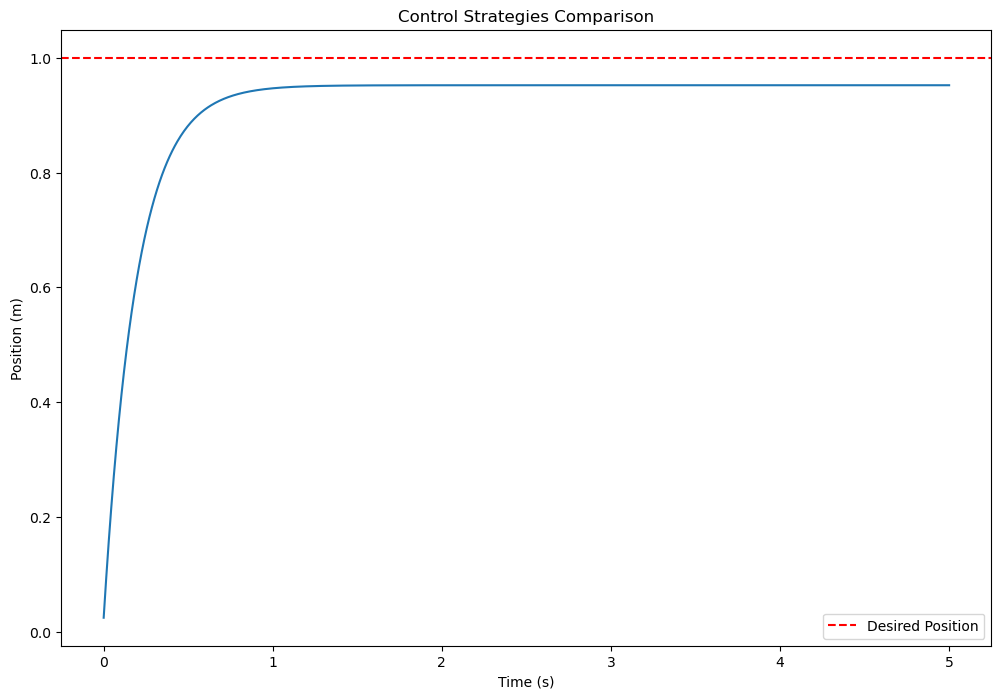

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# System parameters
mass = 1.0  # mass (kg)
damping = 10.0  # damping coefficient (Ns/m)
stiffness = 100.0  # spring stiffness (N/m)
desired_position = 1.0  # desired position (m)

# Control parameters for ADRC and ILC
kp = 1000.0  # Proportional gain for ADRC
b = 15.0   # System parameter for ADRC
omega = 12.0  # Frequency component for ADRC
kp1 = 800.0  # Proportional gain for current iteration in ILC
kp2 = 200.0  # Proportional gain for previous iteration in ILC
iterations = 100  # Number of iterations for ILC

# Time vector
time = np.linspace(0, 5, 1000)  # 5 seconds, 1000 points

# Initial conditions: position and velocity
initial_conditions = [0.0, 0.0]

# Define the ADRC controller function
def adrc_controller(setpoint, measured_value, kp, b, omega, dt, tracking_error_prev):
    tracking_error = setpoint - measured_value
    control_signal = kp * tracking_error - b * tracking_error_prev
    tracking_error_prev = (1 - omega * dt) * tracking_error
    return control_signal, tracking_error_prev

# Define the system dynamics function
def system_dynamics(y, t, u):
    position, velocity = y
    acceleration = (u - damping * velocity - stiffness * position) / mass
    return [velocity, acceleration]

# Define the desired position function
def desired_position_func(t):
    return desired_position

# Run simulation with ILC+ADRC
results = np.zeros((iterations, len(time)))
errors = np.zeros((iterations, len(time)))

for j in range(iterations):
    tracking_error_prev = 0
    
    for i in range(len(time)):
        current_time = time[i]
        if i == 0:
            y = initial_conditions
        else:
            y = results[j, i-1], results[j, i-1] - results[j, i-2] if i > 1 else 0

        setpoint = desired_position_func(current_time)
        u, tracking_error_prev = adrc_controller(setpoint, y[0], kp, b, omega, time[1], tracking_error_prev)
        
        # ILC Update
        if j > 0:
            u += kp1 * errors[j-1, i] + kp2 * errors[j-2, i] if j > 1 else 0

        # Simulate system response
        y = odeint(system_dynamics, y, [current_time, current_time + time[1]], args=(u,))[-1]
        results[j, i] = y[0]
        errors[j, i] = setpoint - y[0]

# Plot results
plt.figure(figsize=(12, 8))
# for j in range(iterations):
#     plt.plot(time, results[j], label=f'Iteration {j+1} - ILC+ADRC')
plt.plot(time, results[99])
plt.axhline(desired_position, color='r', linestyle='--', label='Desired Position')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Control Strategies Comparison')
plt.legend()
plt.show()


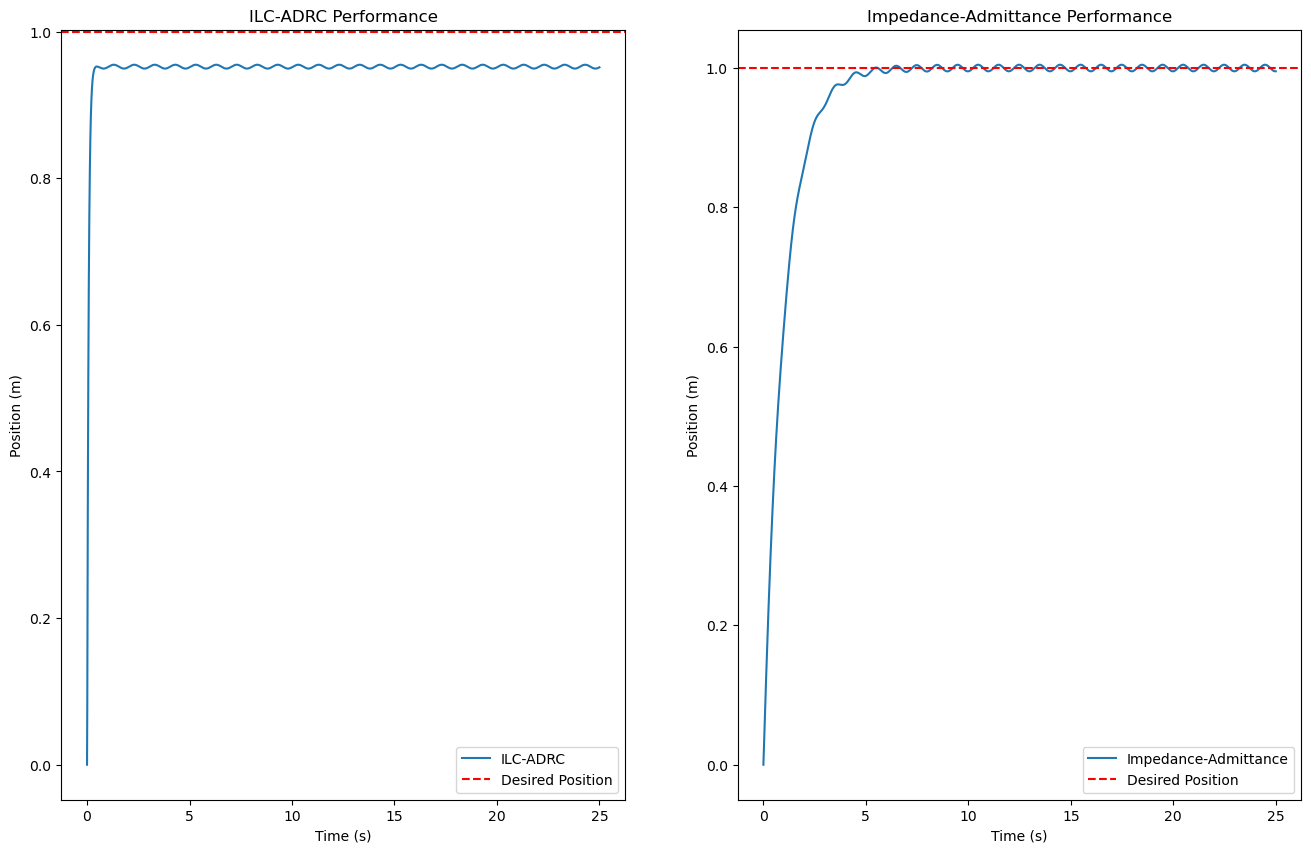

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Shared System Parameters
mass = 0.5  # mass (kg)
damping = 100.0  # damping coefficient (Ns/m)
stiffness = 100.0  # spring stiffness (N/m)
desired_position = 1.0  # desired position (m)
time = np.linspace(0, 25, 2000)  # 5 seconds, 1000 points

# External Force and Interaction Dynamics
def nonlinear_external_force(t):
    return 5.0 * np.sin(2 * np.pi * t)

def interaction_dynamics(t):
    return np.sin(2 * np.pi * t)

# System Dynamics Function for Both Controllers
def system_dynamics(y, t, u):
    position, velocity = y
    external_force = nonlinear_external_force(t) + interaction_dynamics(t)
    acceleration = (u - damping * velocity - stiffness * position + external_force) / mass
    return [velocity, acceleration]

# Impedance-Admittance Dynamics
def impedance_admittance_dynamics(y, t):
    position, velocity = y
    interaction_force = nonlinear_external_force(t) + interaction_dynamics(t)
    desired_stiffness = 200.0
    desired_damping = 200.0
    acc = (interaction_force - desired_damping * velocity - desired_stiffness * (position - desired_position)) / mass
    return [velocity, acc]

# ILC-ADRC Dynamics Function
def ilc_adrc_controller(setpoint, measured_value, kp, b, omega, dt, tracking_error_prev):
    tracking_error = setpoint - measured_value
    control_signal = kp * tracking_error - b * tracking_error_prev
    tracking_error_prev = (1 - omega * dt) * tracking_error
    return control_signal, tracking_error_prev

# Parameters for ILC-ADRC
kp = 1000.0
b = 15.0
omega = 12.0
kp1 = 800.0
kp2 = 200.0
iterations = 100
errors = np.zeros((iterations, len(time)))

# Run ILC-ADRC Simulation
ilc_adrc_results = np.zeros((iterations, len(time)))
for j in range(iterations):
    tracking_error_prev = 0
    for i in range(1, len(time)):
        current_time = time[i]
        if i == 0:
            y = initial_conditions
        else:
            y = ilc_adrc_results[j, i-1], ilc_adrc_results[j, i-1] - ilc_adrc_results[j, i-2]

        setpoint = desired_position
        control_signal, tracking_error_prev = ilc_adrc_controller(setpoint, y[0], kp, b, omega, time[1], tracking_error_prev)

        # ILC Update
        if j > 0:
            control_signal += kp1 * errors[j-1, i-1]
            if j > 1:
                control_signal += kp2 * errors[j-2, i-1]

        # Simulate system response with system dynamics
        y = odeint(system_dynamics, y, [current_time, current_time + time[1]], args=(control_signal,))[-1]
        ilc_adrc_results[j, i] = y[0]
        errors[j, i] = setpoint - y[0]

# Run Impedance-Admittance Dynamics Simulation
imp_adm_results = odeint(impedance_admittance_dynamics, [0.0, 0.0], time)

# Plotting the Results
plt.figure(figsize=(16, 10))

# ILC-ADRC Plot
plt.subplot(1, 2, 1)
plt.plot(time, ilc_adrc_results[-1], label='ILC-ADRC')
plt.axhline(desired_position, color='r', linestyle='--', label='Desired Position')
plt.title('ILC-ADRC Performance')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

# Impedance-Admittance Plot
plt.subplot(1, 2, 2)
plt.plot(time, imp_adm_results[:, 0], label='Impedance-Admittance')
plt.axhline(desired_position, color='r', linestyle='--', label='Desired Position')
plt.title('Impedance-Admittance Performance')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

plt.show()


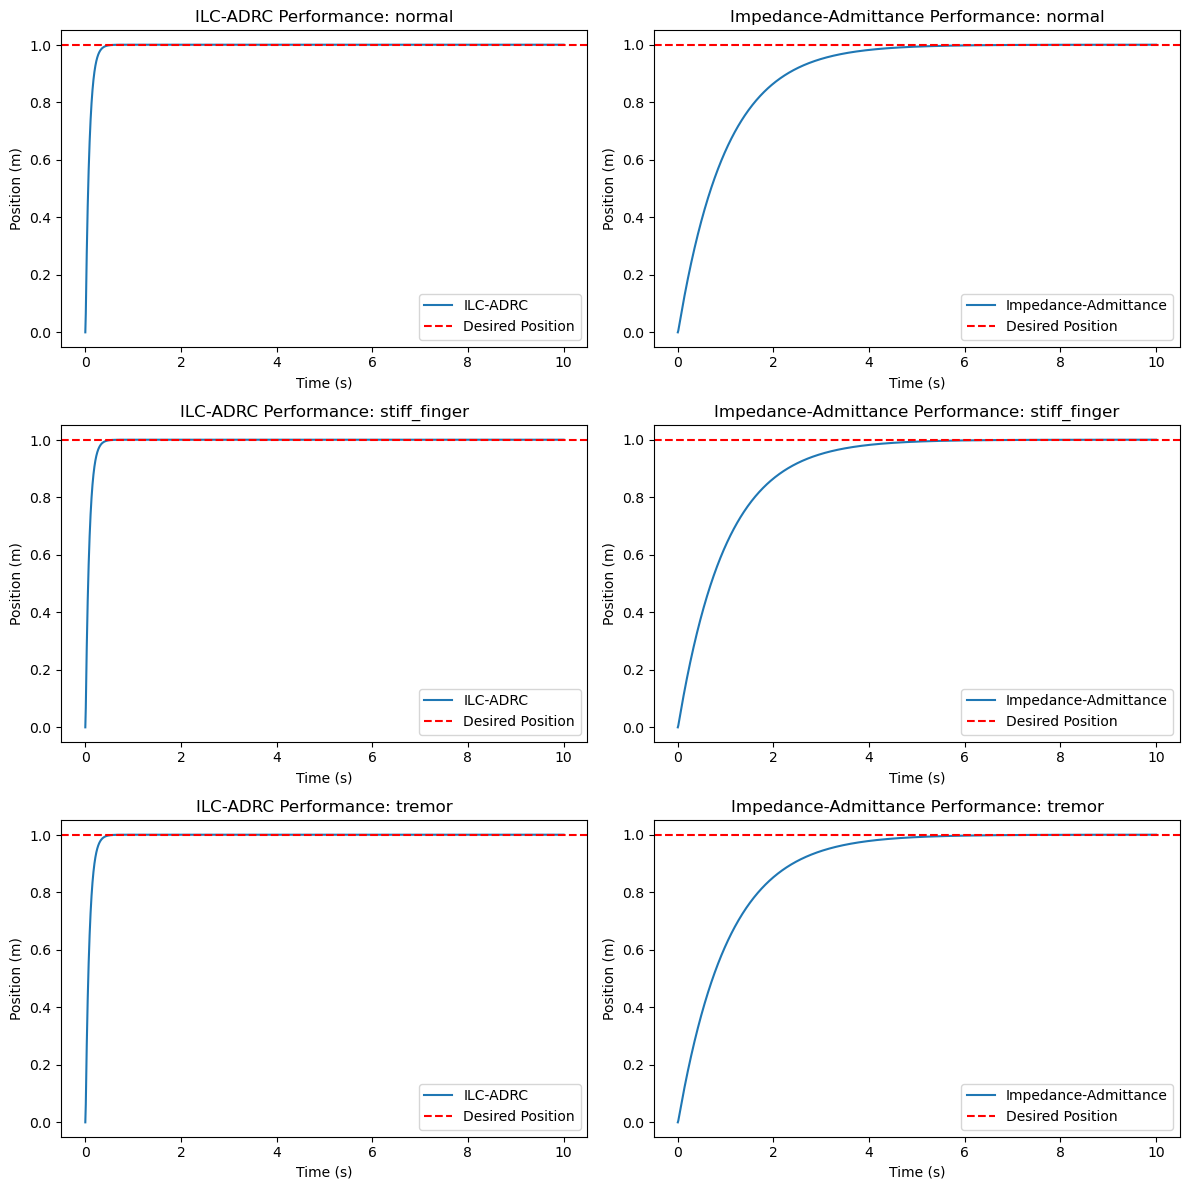

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Shared System Parameters
mass = 0.5  # mass (kg)
damping = 100.0  # damping coefficient (Ns/m)
stiffness = 100.0  # spring stiffness (N/m)
desired_position = 1.0  # desired position (m)
time = np.linspace(0, 10, 1000)  # 5 seconds, 1000 points

# Patient feedback patterns
patient_feedback_patterns = {
    'normal': {'stiffness_adjustment': 0.1, 'damping_adjustment': 0.1, 'position_adjustment': 0.001},
    'stiff_finger': {'stiffness_adjustment': 0.2, 'damping_adjustment': 0.2, 'position_adjustment': 0.001},
    'tremor': {'stiffness_adjustment': 0.05, 'damping_adjustment': 0.1, 'position_adjustment': 0.001}
}

# External Force and Interaction Dynamics
def nonlinear_external_force(t):
    return 10.0 * np.sin(10 * np.pi * t)

def interaction_dynamics(t):
    return np.sin(2 * np.pi * t)

# Updated System Dynamics Function for Both Controllers
def system_dynamics(y, t, u, user_profile):
    position, velocity = y
    feedback = patient_feedback_patterns[user_profile]
    external_force = nonlinear_external_force(t) + interaction_dynamics(t)
    adjusted_damping = damping * (1 + feedback['damping_adjustment'])
    adjusted_stiffness = stiffness * (1 + feedback['stiffness_adjustment'])
    desired_pos = desired_position * (1 + feedback['position_adjustment'])
    # Counteracting the external force directly might help reduce oscillations
    acceleration = (u - adjusted_damping * velocity - adjusted_stiffness * (position - desired_pos)) / mass
    return [velocity, acceleration]

# ILC-ADRC Dynamics Function
def ilc_adrc_controller(setpoint, measured_value, kp, b, omega, dt, tracking_error_prev, user_profile):
    feedback = patient_feedback_patterns[user_profile]
    adjusted_kp = kp + kp * feedback['stiffness_adjustment']
    tracking_error = setpoint - measured_value
    control_signal = adjusted_kp * tracking_error - b * tracking_error_prev
    tracking_error_prev = (1 - omega * dt) * tracking_error
    return control_signal, tracking_error_prev

def impedance_admittance_simulation(user_profile):
    # Using a more conservative approach to counteract the oscillations
    initial_conditions = [0.0, 0.0]  # Starting from rest position and velocity
    results = odeint(system_dynamics, initial_conditions, time, args=(0, user_profile))
    return results[:, 0]

# Parameters for ILC-ADRC
kp = 1000.0
b = 15.0
omega = 12.0
kp1 = 800.0
kp2 = 200.0
iterations = 100

# Running simulations for each user profile
results = {}

for user_profile in patient_feedback_patterns:
    errors = np.zeros((iterations, len(time)))
    ilc_adrc_results = np.zeros((iterations, len(time)))

    # Run ILC-ADRC Simulation for each user profile
    for j in range(iterations):
        tracking_error_prev = 0
        for i in range(1, len(time)):
            current_time = time[i]
            y = [ilc_adrc_results[j, i-1], 0] if i == 1 else [ilc_adrc_results[j, i-1], ilc_adrc_results[j, i-1] - ilc_adrc_results[j, i-2]]

            setpoint = desired_position + desired_position * patient_feedback_patterns[user_profile]['position_adjustment']
            control_signal, tracking_error_prev = ilc_adrc_controller(setpoint, y[0], kp, b, omega, time[1], tracking_error_prev, user_profile)

            # ILC Update
            if j > 0:
                control_signal += kp1 * errors[j-1, i-1]
                if j > 1:
                    control_signal += kp2 * errors[j-2, i-1]

            # Simulate system response with system dynamics
            y = odeint(system_dynamics, y, [current_time, current_time + time[1]], args=(control_signal, user_profile))[-1]
            ilc_adrc_results[j, i] = y[0]
            errors[j, i] = setpoint - y[0]

    results[user_profile] = ilc_adrc_results[-1]

# Plotting the Results for each user profile
plt.figure(figsize=(12, 12))

for idx, user_profile in enumerate(patient_feedback_patterns):
    # ILC-ADRC Plot
    plt.subplot(len(patient_feedback_patterns), 2, 2 * idx + 1)
    plt.plot(time, results[user_profile], label='ILC-ADRC')
    plt.axhline(desired_position, color='r', linestyle='--', label='Desired Position')
    plt.title(f'ILC-ADRC Performance: {user_profile}')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.legend()

    # Impedance-Admittance Plot
    plt.subplot(len(patient_feedback_patterns), 2, 2 * idx + 2)
    imp_adm_results = impedance_admittance_simulation(user_profile)
    plt.plot(time, imp_adm_results, label='Impedance-Admittance')
    plt.axhline(desired_position, color='r', linestyle='--', label='Desired Position')
    plt.title(f'Impedance-Admittance Performance: {user_profile}')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.legend()

plt.tight_layout()
plt.show()
